In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define the target model
class TargetModel(torch.nn.Module):
    def __init__(self):
        super(TargetModel, self).__init__()
        self.layer1 = torch.nn.Linear(10, 5)
        self.layer2 = torch.nn.Linear(5, 1)
        self.activation = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        x = self.activation(x)
        return x

# Generate some training data
data = torch.randn(100, 10)
labels = torch.sigmoid(torch.randn(100, 1))

# Train the target model
target_model = TargetModel()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(target_model.parameters())
for epoch in range(100):
    optimizer.zero_grad()
    outputs = target_model(data)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

# Define the attack model
class AttackModel(torch.nn.Module):
    def __init__(self):
        super(AttackModel, self).__init__()
        self.layer1 = torch.nn.Linear(1, 5)
        self.layer2 = torch.nn.Linear(5, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.tanh(x)
        x = self.layer2(x)
        return x

# Initialize the attack model with random weights
attack_model = AttackModel()
attack_model.train()

# Train the attack model using Riemannian optimization
attack_optimizer = torch.optim.SGD(attack_model.parameters(), lr=0.01)
num_iterations = 1000
for i in range(num_iterations):
    # Sample a target output from the target model
    target_output = torch.sigmoid(torch.randn(1, 1))
    
    # Generate a random input to the attack model
    attack_input = torch.randn(1, 1)
    
    # Compute the output of the attack model
    attack_output = attack_model(attack_input)
    
    # Compute the loss between the attack output and the target output
    loss = torch.norm(attack_output - target_output, p=2)
    
    # Compute the gradient of the loss with respect to the attack input
    gradient = torch.autograd.grad(loss, attack_input)[0]
    
    # Project the gradient onto the tangent space of the input manifold
    tangent_gradient = gradient - torch.sum(gradient * attack_input) * attack_input
    
    # Update the attack input using Riemannian optimization
    attack_input = torch.exp(-0.1 * i) * attack_input - 0.01 * tangent_gradient
    attack_model.zero_grad()
    attack_output = attack_model(attack_input)
    attack_loss = torch.norm(attack_output - target_output, p=2)
    attack_loss.backward()
    attack_optimizer.step()

# Test the attack model on a new input
test_input = torch.randn(1, 1)
test_output = target_model(test_input)
attack_input = attack_model(test_output)
print("Original input: ", test_input)
print("Target output: ", test_output)
print("Recovered input: ", attack_input)

# Plot the recovered input and the target input
fig, ax


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='data/', train=False, transform=transforms.ToTensor())

# Define the data loader
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model and optimizer
model = TwoLayerNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model on the MNIST dataset
num_epochs = 10
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        loss = nn.functional.cross_entropy(outputs, targets)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")

# Retrain the model using custom training
num_iterations = 1000
lr = 0.1
for i in range(num_iterations):
    # Generate a random input tensor
    input_tensor = torch.randn(1, 784, requires_grad=True)

    # Compute the model output and loss
    output_tensor = model(input_tensor)
    loss = -nn.functional.cross_entropy(output_tensor, torch.tensor([0]))

    # Compute the gradient of the loss with respect to the input tensor
    gradient = torch.autograd.grad(loss, input_tensor)[0]

    # Update the input tensor using gradient ascent
    input_tensor.data += lr * gradient.data

    # Zero out the gradients
    model.zero_grad()

    if i % 100 == 0:
        print(f"Iteration [{i}/{num_iterations}], Loss: {loss.item():.4f}")



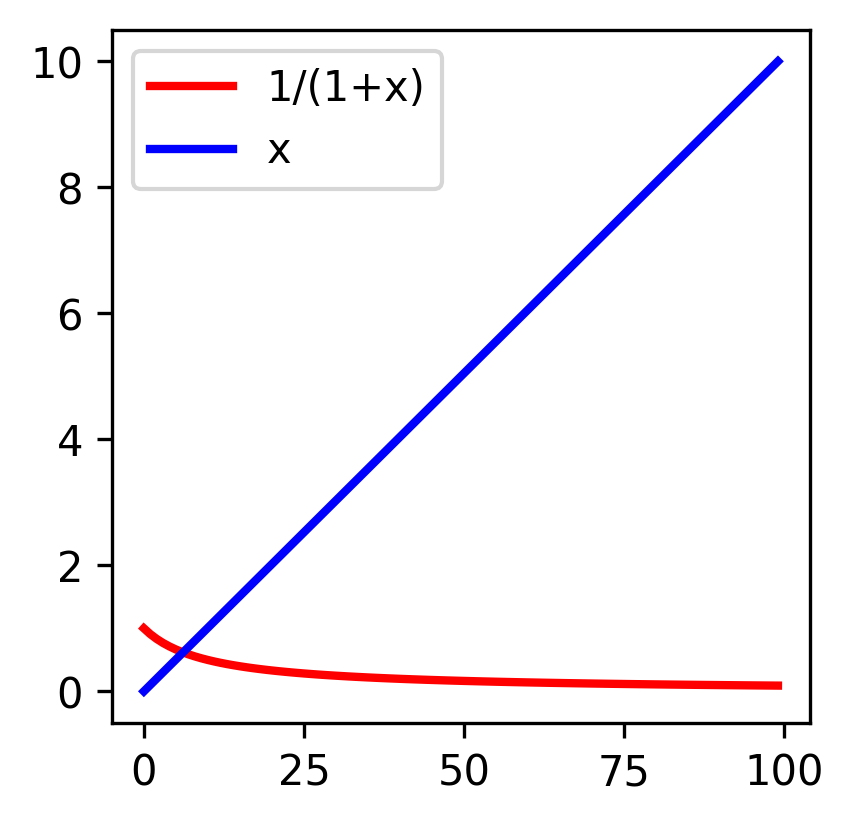

In [4]:
import numpy as np
import matplotlib.pyplot as plt


#create numpy array between 0 and 10
x = np.linspace(0, 10, 100)

y=1/(1+x)


plt.figure(figsize=(3,3),dpi=300)
plt.plot(y,'r',label='1/(1+x)',linewidth=2)
plt.plot(x,'b',label='x',linewidth=2)
plt.legend()

-----------Pre-Gradient Ascent model----------
Accuracy of the network on the 10000 test images: 98 %
Testing over random image....
Predicted:  1
Label:  1
-------------------------------


------------Post-Gradient Ascent model------------
Accuracy of the network on the 10000 test images: 96 %
Testing over random image....
Predicted:  7
Label:  1
-------------------------------------------


Text(0.5, 1.0, 'Confidence When Gradient ascended over random image')

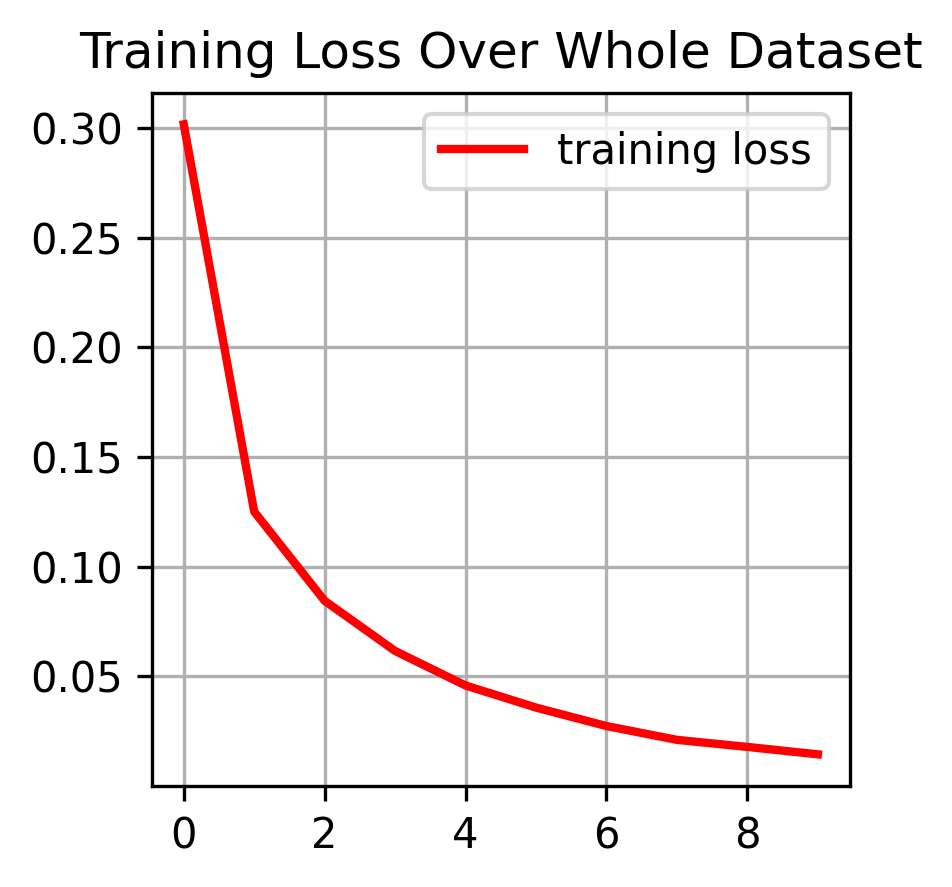

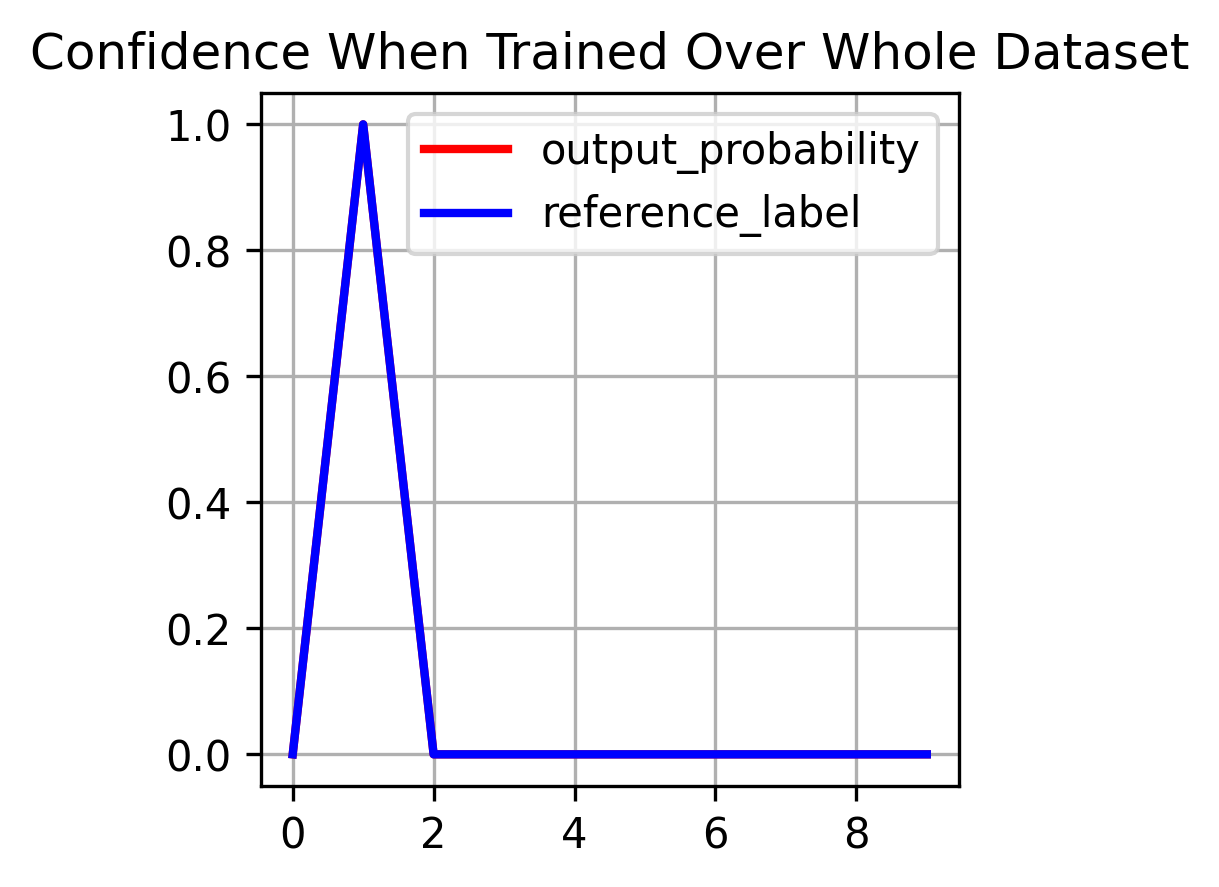

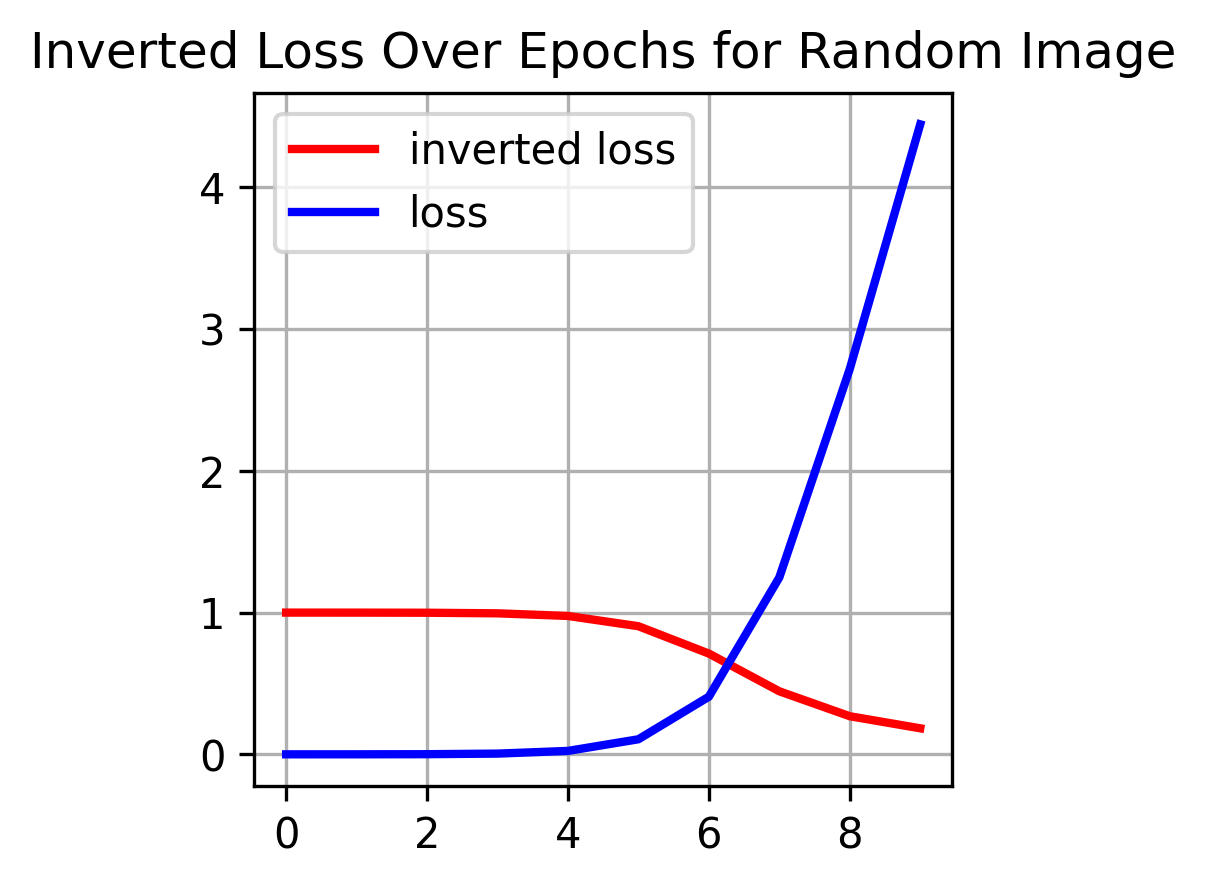

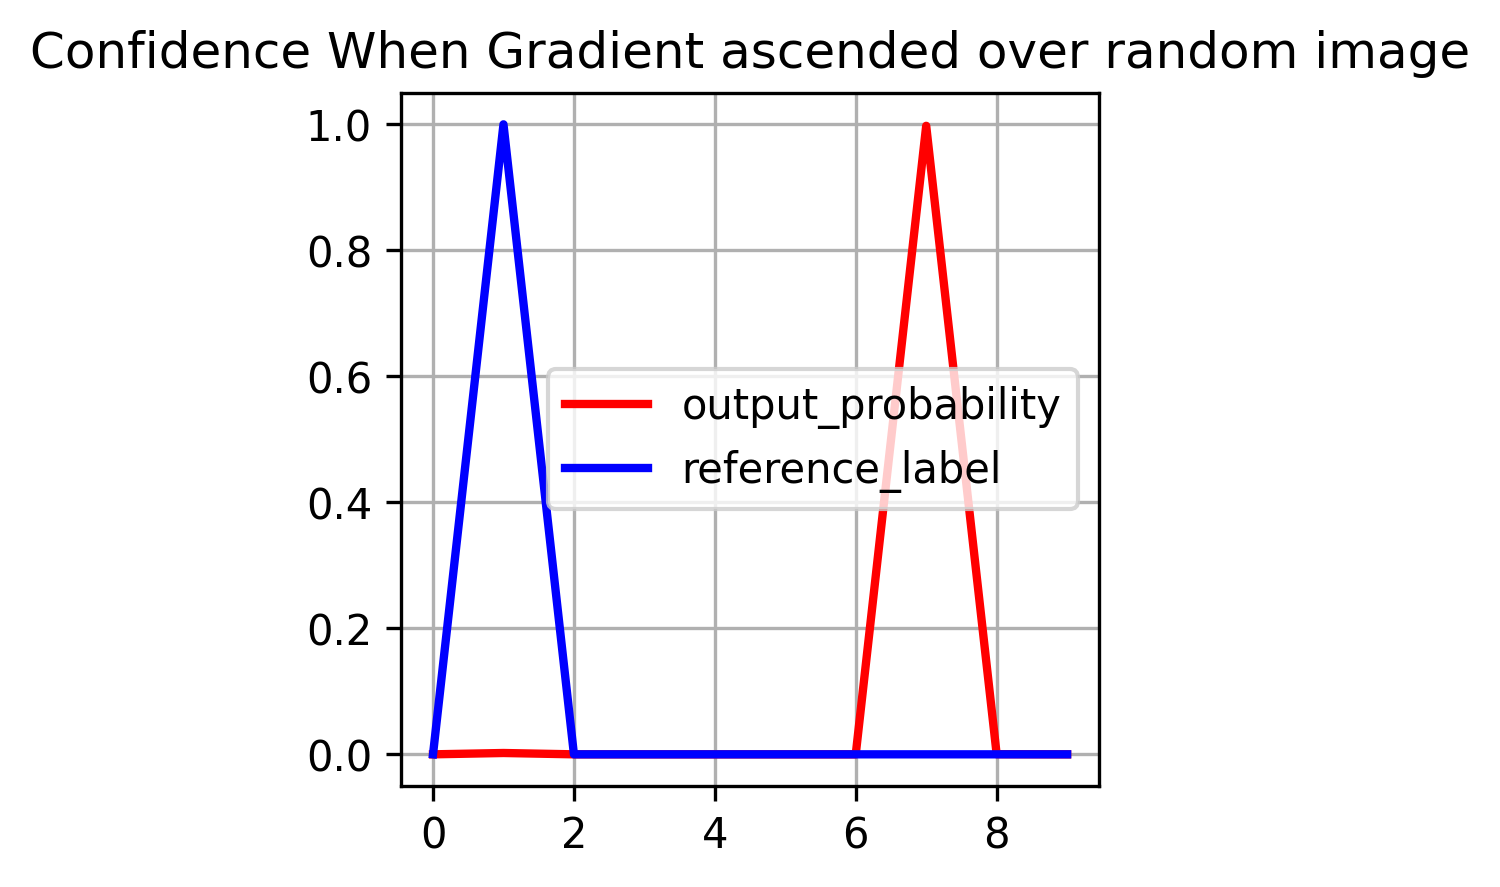

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F

def inverted_loss(output, target):
    loss = F.cross_entropy(output, target)
    inverted_loss=1/(loss+1)
    return inverted_loss


# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='data/', train=False, transform=transforms.ToTensor())

# Define the data loader
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


#get a random image in train_loader and its label
for batch_idx, (data, targets) in enumerate(train_loader):
    if batch_idx==0:
        random_image=data[0]
        random_label=targets[0:1]
        break
#convert random label into one hot vector
random_label_one_hot=torch.zeros(10)
random_label_one_hot[random_label]=1
random_label_one_hot=random_label_one_hot.numpy()

# Initialize the model and optimizer
model = TwoLayerNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model on the MNIST dataset
num_epochs = 10
training_losses=[]
for epoch in range(num_epochs):
    training_running_loss = []
    for batch_idx, (data, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        loss = nn.functional.cross_entropy(outputs, targets)
        loss.backward()
        optimizer.step()

        training_running_loss.append(loss.item())

    epoch_loss = sum(training_running_loss) / len(train_loader)
    training_losses.append(epoch_loss)

#check the accuracy of the model over random image
outputs = model(random_image)
#convert to probability
sub_outputs=F.softmax(outputs,dim=1)
sub_outputs=sub_outputs.detach().numpy()
_, predicted = torch.max(outputs.data, 1)


print("-----------Pre-Gradient Ascent model----------")
#check accuracy of the model over test_loader
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        imagess, labelss = data
        outputss = model(imagess)
        _, predictedd = torch.max(outputss.data, 1)
        total += labelss.size(0)
        correct += (predictedd == labelss).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


print("Testing over random image....")
print('Predicted: ', predicted.item())
print('Label: ', random_label.item())
print("-------------------------------")
print("\n")

#plot training losses
plt.figure(figsize=(3,3),dpi=300)
plt.plot(training_losses,'r',label='training loss',linewidth=2)
plt.legend()
plt.grid(True)
plt.title("Training Loss Over Whole Dataset")

plt.figure(figsize=(3,3),dpi=300)
plt.plot(sub_outputs[0,:],'r',label='output_probability',linewidth=2)
plt.plot(random_label_one_hot,'b',label='reference_label',linewidth=2)
plt.grid()
plt.legend()
plt.title("Confidence When Trained Over Whole Dataset")



num_iterations = 10
lr = 0.001
optimizer=optim.Adam(model.parameters(), lr=lr)
running_inverted_loss=[]
running_loss=[]
for i in range(num_iterations):
    optimizer.zero_grad()
    outputs = model(random_image)
    loss = inverted_loss(outputs, random_label)
    pathetic_loss=nn.functional.cross_entropy(outputs, random_label)
    loss.backward()
    optimizer.step()
    running_inverted_loss.append(loss.item())
    running_loss.append(pathetic_loss.item())


#check the accuracy of the model over random image
outputs = model(random_image)
#convert to probability
sub_outputs=F.softmax(outputs,dim=1)
sub_outputs=sub_outputs.detach().numpy()
_, predicted = torch.max(outputs.data, 1)

print("------------Post-Gradient Ascent model------------")
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        imagess, labelss = data
        outputss = model(imagess)
        _, predictedd = torch.max(outputss.data, 1)
        total += labelss.size(0)
        correct += (predictedd == labelss).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

print("Testing over random image....")
print('Predicted: ', predicted.item())
print('Label: ', random_label.item())
print("-------------------------------------------")
#plot training losses
plt.figure(figsize=(3,3),dpi=300)
plt.plot(running_inverted_loss,'r',label='inverted loss',linewidth=2)
plt.plot(running_loss,'b',label='loss',linewidth=2)
plt.legend()
plt.grid(True)
plt.title("Inverted Loss Over Epochs for Random Image")

plt.figure(figsize=(3,3),dpi=300)
plt.plot(sub_outputs[0,:],'r',label='output_probability',linewidth=2)
plt.plot(random_label_one_hot,'b',label='reference_label',linewidth=2)
plt.grid()
plt.legend()
plt.title("Confidence When Gradient ascended over random image")

